<a href="https://colab.research.google.com/github/intTing/1/blob/main/figure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<>:76: SyntaxWarning: invalid escape sequence '\e'
<>:76: SyntaxWarning: invalid escape sequence '\e'
/tmp/ipython-input-1890830960.py:76: SyntaxWarning: invalid escape sequence '\e'
  ax.text(Pi[0]+0.08, Pi[1]+0.07, Pi[2]-0.03, "$y=\exp_x(\overrightarrow{xy})$", fontsize=15)


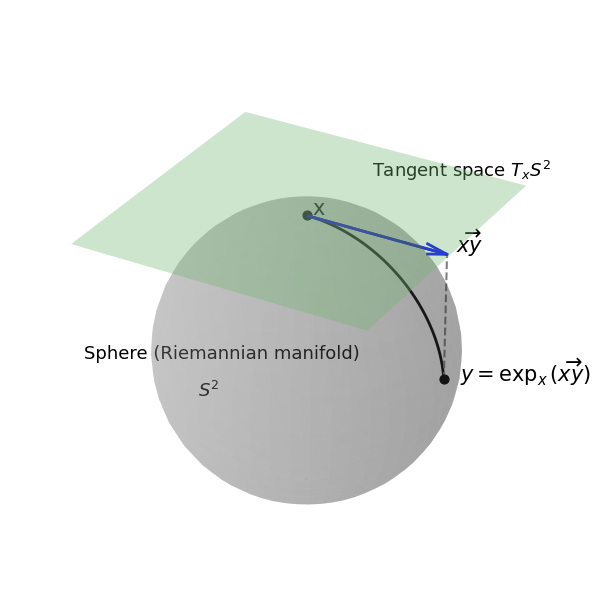

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def slerp_on_S2(p, q, num=100):
    p = p / np.linalg.norm(p)
    q = q / np.linalg.norm(q)
    cos_theta = np.clip(np.dot(p, q), -1.0, 1.0)
    theta = np.arccos(cos_theta)
    if np.isclose(theta, 0.0):
        return np.tile(p, (num, 1))
    sin_theta = np.sin(theta)
    ts = np.linspace(0, 1, num)
    return np.array([np.sin((1 - t) * theta) / sin_theta * p + np.sin(t * theta) / sin_theta * q for t in ts])

R = 1.0
P = np.array([0.0, 0.0, 1.0])

phi = np.deg2rad(0)
alpha = np.deg2rad(85)  # Move slightly towards the center of the sphere
#phi = np.deg2rad(20)
#alpha = np.deg2rad(50)
Pi = np.array([np.sin(alpha) * np.cos(phi),
               np.sin(alpha) * np.sin(phi),
               np.cos(alpha)])

z_plane = P[2]
Si = np.array([Pi[0], Pi[1], z_plane])
plane_half = max(abs(Si[0]), abs(Si[1])) * 1.05
xx = np.linspace(-plane_half, plane_half, 2)
yy = np.linspace(-plane_half, plane_half, 2)
XX, YY = np.meshgrid(xx, yy)
ZZ = np.ones_like(XX) * z_plane

# Sphere mesh
u = np.linspace(0, 2*np.pi, 50)
v = np.linspace(0, np.pi, 25)
Xs = R * np.outer(np.cos(u), np.sin(v))
Ys = R * np.outer(np.sin(u), np.sin(v))
Zs = R * np.outer(np.ones_like(u), np.cos(v))

# Geodesic
geo = slerp_on_S2(P, Pi, num=100)

# Plot
fig = plt.figure(figsize=(9, 7.5))
ax = fig.add_subplot(111, projection='3d')

# Sphere (gray, semi-transparent)
ax.plot_surface(Xs, Ys, Zs, linewidth=0.2, antialiased=True, alpha=0.25, color='gray')
# Tangent plane (light green, semi-transparent)
ax.plot_surface(XX-0.03, YY, ZZ, alpha=0.35, color='lightgreen')

# Geodesic arc
ax.plot(geo[:,0], geo[:,1], geo[:,2], linewidth=2, color='black')

# Points
ax.scatter([P[0]], [P[1]], [P[2]], s=40, color='k')
ax.scatter([Pi[0]], [Pi[1]], [Pi[2]], s=40, color='k')

# Drop vertical from Pi to Si
ax.plot([Pi[0], Si[0]], [Pi[1], Si[1]], [Pi[2], Si[2]], linestyle='dashed', color='gray')

# Blue line in tangent plane from P to Si
ax.plot([P[0], Si[0]], [P[1], Si[1]], [P[2], Si[2]], linewidth=2, color='blue')

# Blue arrow in tangent plane from P to Si
ax.quiver(P[0], P[1], P[2], Si[0]-P[0], Si[1]-P[1], Si[2]-P[2],
          color='blue', linewidth=2, arrow_length_ratio=0.15)


# Labels
ax.text(0.3, 0.3, z_plane + 0.22, "Tangent space $T_xS^2$", fontsize=13)
ax.text(-1.05, -1, 0.15, "Sphere (Riemannian manifold)", fontsize=13, rotation=0)
ax.text(-0.2, -1, 0.13, "$S^2$", fontsize=13, rotation=0)
ax.text(P[0]+0.07, P[1]-0.05, P[2]+0.05, "x", fontsize=15)
ax.text(Pi[0]+0.08, Pi[1]+0.07, Pi[2]-0.03, "$y=\exp_x(\overrightarrow{xy})$", fontsize=15)
ax.text(Si[0]+0.05, Si[1]+0.02, Si[2]+0.02, r"$\overrightarrow{xy}$", fontsize=15)

# ax.text((P[0]+Si[0])/2+0.05, (P[1]+Si[1])/2, Si[2]+0.05, r"$\|s_i\|_2$", fontsize=10)

mid = geo[55]
# ax.text(mid[0]+0.05, mid[1]+0.02, mid[2]+0.02, r"Geodesic distance $\theta$", fontsize=10)
# The black line is geodesic

# Aesthetics
ax.set_box_aspect([1,1,0.7])
ax.set_xlim([-1.2, 1.2])
ax.set_ylim([-1.2, 1.2])
ax.set_zlim([-0.4, 1.3])
# ax.set_title("Sphere as Riemannian manifold and its tangent space at P")
ax.set_axis_off()

plt.show()


<>:66: SyntaxWarning: invalid escape sequence '\p'
<>:66: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipython-input-2100850912.py:66: SyntaxWarning: invalid escape sequence '\p'
  ax.set_title(r"$X(t) = M + A\cos(\omega t - \phi)$" + f"  (M={M:.1f}, A={A:.1f}, T={'2π'}, $\phi$={'π/2'})")


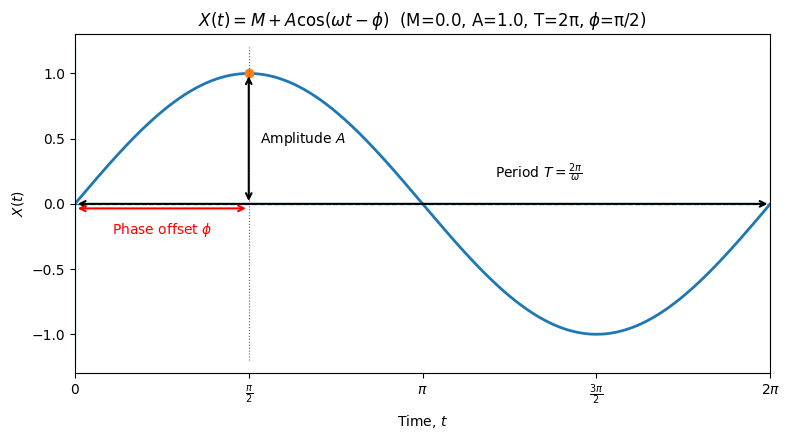

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
M = 0.0            # (baseline)
A = 1.0            # Amplitude
tau = 2*np.pi      # Period T
omega = 2*np.pi/tau # w = 2π·f = 2π/T
phi = np.pi/2      # Acrophase φ set to pi/2

# Acrophase φ (phase shift in radians) in the cosinor model: y = M + A cos(2π t/τ + φ)

# Time vector for one period
t = np.linspace(0, tau, 800)
y = M + A*np.cos(omega*t - phi)

# Compute peak time (t_peak when cos argument = 0)
t_peak = phi / omega
t_peak = t_peak % tau
y_peak = M + A

# Start plotting
fig, ax = plt.subplots(figsize=(8, 4.5))

ax.plot(t, y, linewidth=2)
ax.axhline(M, linestyle='--', linewidth=1)  # MESOR (baseline)

# Period annotation
ax.annotate("", xy=(tau, M), xytext=(0, M),
            arrowprops=dict(arrowstyle="<->", lw=1.5))
ax.text(tau/1.5, M + 0.15*A, r"Period $T=\frac{2\pi}{\omega}$", ha="center", va="bottom")

# Amplitude annotation
ax.annotate("", xy=(t_peak, y_peak), xytext=(t_peak, M),
            arrowprops=dict(arrowstyle="<->", lw=1.5))
ax.text(t_peak + 0.10, M + A/2, r"Amplitude $A$", va="center")

# Acrophase annotation (red line)
# ax.annotate("", xy=(t_peak, M), xytext=(0, M),arrowprops=dict(arrowstyle="<->", lw=1.5, color="red"))
# ax.text(t_peak/1.5, M - 0.15*A, r"Acrophase $\phi$", ha="center", va="top", color="red")

# phase offset
# Acrophase annotation (red line, shifted downward slightly)
y_shift = M - 0.035*A   # 0.036 * A below the baseline M
ax.annotate("", xy=(t_peak, y_shift), xytext=(0, y_shift),
            arrowprops=dict(arrowstyle="<->", lw=1.5, color="red"))
ax.text(t_peak/2, y_shift - 0.1*A, r"Phase offset $\phi$",
        ha="center", va="top", color="red")

# Mark the peak
ax.plot([t_peak], [y_peak], 'o')
ax.vlines([0, t_peak, tau], ymin=M-1.2*A, ymax=M+1.2*A, linestyles=['solid','dotted','solid'], linewidth=0.8)

# Axis labels and ticks
ax.set_xlabel("Time, $t$")
#ax.set_ylabel("Signal, $X(t)$")
ax.set_ylabel("$X(t)$")
ax.set_xlim(0, tau)
ax.set_ylim(M - 1.3*A, M + 1.3*A)

# Custom x-axis ticks in radians
ax.set_xticks([0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi])
ax.set_xticklabels([r"$0$", r"$\frac{\pi}{2}$", r"$\pi$", r"$\frac{3\pi}{2}$", r"$2\pi$"])

# Title with formula
ax.set_title(r"$X(t) = M + A\cos(\omega t - \phi)$" + f"  (M={M:.1f}, A={A:.1f}, T={'2π'}, $\phi$={'π/2'})")

plt.tight_layout()
